## Display Proba-V Time-Series
**Author:** René Kopeinig<br>
**Description:** Display Proba-V NDVI (Normalized Difference Vegetation Index) Time-Series with help of Google Earth Engine Python API. Extracting Proba-V NDVI data from a randomly chosen point in Luxembourg.

In [1]:
%matplotlib inline

In [17]:
from IPython.display import Image
import ee, datetime
import pandas as pd
from pylab import *
from matplotlib.pylab import rcParams

ee.Initialize()

### Load Proba-V image collection and a point geometry 
Selected location of point is from the Proba-V Footprint X18Y02 in Luxembourg, Europe

In [18]:
collection = ee.ImageCollection('VITO/PROBAV/C1/S1_TOC_100M')
point = {'type':'Point', 'coordinates':[-99.545934,20.572173]};

### Retrieve information, reshape and calculate NDVI
Retrieving information from point geometry with a buffer of 500m over image collection. Reshaping data and calculating NDVI from **RED** and **NIR** band.

In [19]:
info = collection.getRegion(point,500).getInfo()

In [20]:
# Reshape image collection 
header = info[0]
data = array(info[1:])

iTime = header.index('time')
time = [datetime.datetime.fromtimestamp(i/1000) for i in (data[0:,iTime].astype(int))]

# List of used image bands
band_list = ['RED',u'NIR']

iBands = [header.index(b) for b in band_list]
yData = data[0:,iBands].astype(np.float)

# Calculate NDVI
red = yData[:,0]
nir = yData[:,1]
ndvi = (nir - red) / (nir + red)

### Reshape NDVI array into Pandas Dataframe

In [35]:
df = pd.DataFrame(data=ndvi, index=list(range(len(ndvi))), columns=['NDVI'])
df = df.interpolate()
df['Date'] = pd.Series(time, index=df.index)

### Plot NDVI Time-Series for the selected location in Luxembourg

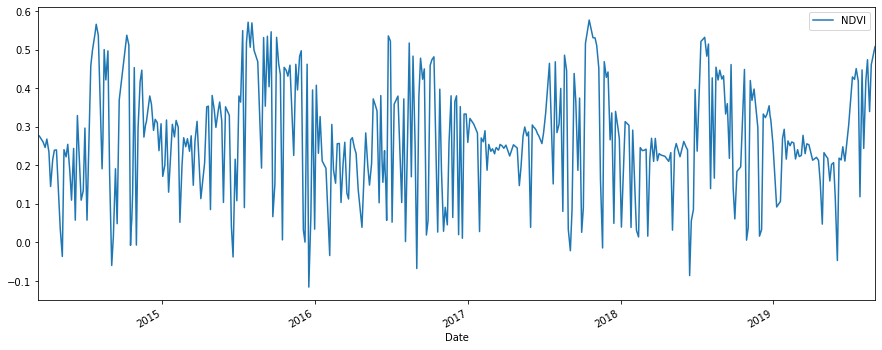

In [36]:
rcParams['figure.figsize'] = 15, 6
df.plot(y='NDVI',x='Date')
plt.show()